In [4]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/332.0 MB ? eta -:--:--
   --

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\user\\AppData\\Local\\Temp\\pip-unpack-eefpmudq\\tensorflow-2.20.0-cp313-cp313-win_amd64.whl'
Check the permissions.



In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


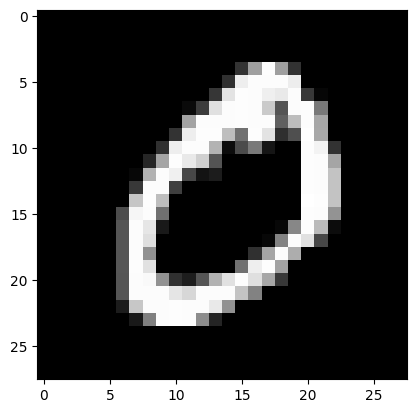

In [3]:
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [4]:
num = 10
images = X_train[:num]
labels = y_train[:num]

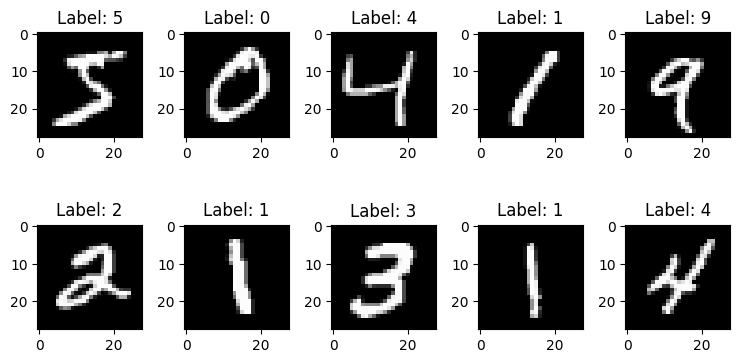

In [5]:
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
x_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
x_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

In [7]:
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(x_train_flattened)

y_kmeans = kmeans.predict(x_test_flattened)

# print("Cluster centers:", kmeans.cluster_centers_)

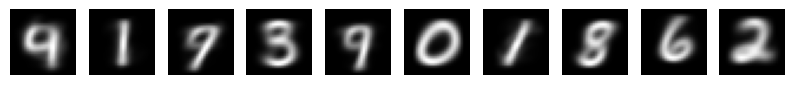

In [8]:
fig, axes = plt.subplots(1, num_clusters, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

In [9]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-Means clustering on the test data
score = silhouette_score(x_test_flattened, y_kmeans)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0586


In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate the ARI and NMI scores
ari = adjusted_rand_score(y_test, y_kmeans)
nmi = normalized_mutual_info_score(y_test, y_kmeans)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.3667
Normalized Mutual Information: 0.4926


In [1]:
# 1. Visualisasi Cluster Centers dengan Label
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Cluster {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [ ]:
# 2. Analisis Cluster - Hitung distribusi label asli dalam setiap cluster
from collections import Counter

print("Distribusi label asli dalam setiap cluster:")
print("=" * 50)

for cluster_id in range(10):
    # Ambil indeks data yang masuk ke cluster ini
    cluster_mask = y_kmeans == cluster_id
    cluster_labels = y_test[cluster_mask]
    
    # Hitung frekuensi setiap label
    label_counts = Counter(cluster_labels)
    
    print(f"\nCluster {cluster_id} (Total: {len(cluster_labels)} data):")
    for label in sorted(label_counts.keys()):
        count = label_counts[label]
        percentage = (count / len(cluster_labels)) * 100
        print(f"  Digit {label}: {count} data ({percentage:.1f}%)")


In [ ]:
# 3. Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Buat confusion matrix
cm = confusion_matrix(y_test, y_kmeans)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix: True Labels vs Cluster Assignments')
plt.xlabel('Cluster Assignment')
plt.ylabel('True Label')
plt.show()


In [ ]:
# 4. Visualisasi Sample Images dari Setiap Cluster
def plot_cluster_samples(cluster_id, n_samples=5):
    """Plot sample images dari cluster tertentu"""
    cluster_mask = y_kmeans == cluster_id
    cluster_indices = np.where(cluster_mask)[0]
    
    # Ambil sample acak
    sample_indices = np.random.choice(cluster_indices, 
                                    min(n_samples, len(cluster_indices)), 
                                    replace=False)
    
    fig, axes = plt.subplots(1, len(sample_indices), figsize=(len(sample_indices)*2, 2))
    if len(sample_indices) == 1:
        axes = [axes]
    
    for i, idx in enumerate(sample_indices):
        axes[i].imshow(X_test[idx], cmap='gray')
        axes[i].set_title(f'True: {y_test[idx]}')
        axes[i].axis('off')
    
    plt.suptitle(f'Sample dari Cluster {cluster_id}')
    plt.tight_layout()
    plt.show()

# Plot sample dari beberapa cluster
for cluster_id in [0, 1, 2, 3, 4]:
    plot_cluster_samples(cluster_id, n_samples=5)


In [3]:
# 6. Visualisasi Cluster Purity
def calculate_cluster_purity(y_true, y_pred):
    """Hitung purity untuk setiap cluster"""
    purities = []
    for cluster_id in range(10):
        cluster_mask = y_pred == cluster_id
        if np.sum(cluster_mask) > 0:
            cluster_labels = y_true[cluster_mask]
            most_common_label = Counter(cluster_labels).most_common(1)[0][0]
            purity = np.sum(cluster_labels == most_common_label) / len(cluster_labels)
            purities.append(purity)
        else:
            purities.append(0)
    return purities

purities = calculate_cluster_purity(y_test, y_kmeans)

plt.figure(figsize=(10, 6))
bars = plt.bar(range(10), purities, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Cluster ID')
plt.ylabel('Purity')
plt.title('Cluster Purity (Proporsi label mayoritas dalam setiap cluster)')
plt.xticks(range(10))
plt.ylim(0, 1)

# Tambahkan nilai di atas bar
for i, purity in enumerate(purities):
    plt.text(i, purity + 0.01, f'{purity:.2f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Cluster Purity:")
for i, purity in enumerate(purities):
    print(f"Cluster {i}: {purity:.3f}")


NameError: name 'y_test' is not defined

In [ ]:
# 5. Visualisasi t-SNE untuk melihat distribusi cluster
from sklearn.manifold import TSNE

# Ambil sample data untuk t-SNE (karena t-SNE lambat)
n_samples = 1000
sample_indices = np.random.choice(len(x_test_flattened), n_samples, replace=False)
X_sample = x_test_flattened[sample_indices]
y_sample_true = y_test[sample_indices]
y_sample_pred = y_kmeans[sample_indices]

# Jalankan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

# Plot t-SNE dengan true labels
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample_true, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE dengan True Labels')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Plot t-SNE dengan cluster assignments
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample_pred, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE dengan Cluster Assignments')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()
